In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'C:\\Users\\BHAVYA OJHA'

In [3]:
os.chdir(r"C:\Users\BHAVYA OJHA\OneDrive\Documents\Downloads")

In [4]:
df_rp = pd.read_csv("Ratings_Prediction.csv")
df_rp

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Really Nice,"Actually, I felt like this infinix brand is no...",4
1,1,Wonderful,Laptop is nice but after sometimes heating sta...,4
2,2,Great product,"brilliant design, so sleek and beautiful. stil...",5
3,3,Simply awesome,Everything excellent in price point,5
4,4,Awesome,Mind blowing purchase ever.. very nice perform...,5
...,...,...,...,...
47350,47350,EOS 1500 D Canon,Canon Camera not recording video for more than...,2.0 out of 5 stars
47351,47351,Very bad body gaje,Big lens is worst product body gaje poor,2.0 out of 5 stars
47352,47352,For bigginers ok,Average performance..,2.0 out of 5 stars
47353,47353,I hate it's auto focus,I am hate this camera because of it's more blu...,2.0 out of 5 stars


In [5]:
df_rp.head(10)


,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Really Nice,"Actually, I felt like this infinix brand is no...",4
1,1,Wonderful,Laptop is nice but after sometimes heating sta...,4
2,2,Great product,"brilliant design, so sleek and beautiful. stil...",5
3,3,Simply awesome,Everything excellent in price point,5
4,4,Awesome,Mind blowing purchase ever.. very nice perform...,5
5,5,Best in the market!,Rating given based on features given at this p...,5
6,6,Worth every penny,Only One Laptop In India Who Can Provide All T...,5
7,7,Delightful,Great by the price ❤❤,4
8,8,Just wow!,Very nice product value for money 💰💰,5
9,9,Fabulous!,Highly recommended go for it.,5


In [6]:
df_rp.drop(columns = 'Unnamed: 0',inplace = True)


In [7]:
df_rp.shape


(47355, 3)

In [8]:
df_rp.columns


Index(['Review_Title', 'Review_Text', 'Ratings'], dtype='object')

In [9]:
df_rp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47355 entries, 0 to 47354
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  44071 non-null  object
 1   Review_Text   44520 non-null  object
 2   Ratings       44071 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [10]:
df_rp.isnull().sum()


Review_Title    3284
Review_Text     2835
Ratings         3284
dtype: int64

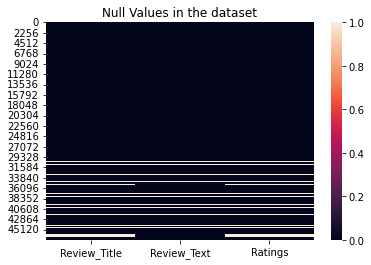

In [11]:
sns.heatmap(df_rp.isnull())
plt.title("Null Values in the dataset")
plt.show()

In [12]:
df_rp["Review_Title"].mode()


0    Wonderful
Name: Review_Title, dtype: object

In [13]:
df_rp["Review_Text"].mode()


0    Good
Name: Review_Text, dtype: object

In [14]:
df_rp.Ratings.value_counts()


5                     18512
4                      5915
5.0 out of 5 stars     3200
1                      2961
4.0 out of 5 stars     2865
1.0 out of 5 stars     2853
2.0 out of 5 stars     2642
3.0 out of 5 stars     2633
3                      1759
2                       731
Name: Ratings, dtype: int64

In [15]:
df_rp["Ratings"].mode()


0    5
Name: Ratings, dtype: object

In [16]:
df_rp["Review_Title"] = df_rp["Review_Title"].fillna(df_rp["Review_Title"].mode()[0])
df_rp["Review_Text"] = df_rp["Review_Text"].fillna(df_rp["Review_Text"].mode()[0])
df_rp["Ratings"] = df_rp["Ratings"].fillna(df_rp["Ratings"].mode()[0])

In [17]:
df_rp.isnull().sum()


Review_Title    0
Review_Text     0
Ratings         0
dtype: int64

In [18]:
df_rp['Ratings'].unique()


array(['4', '5', '3', '1', '2', '2.0 out of 5 stars',
       '3.0 out of 5 stars', '1.0 out of 5 stars', '5.0 out of 5 stars',
       '4.0 out of 5 stars'], dtype=object)

In [19]:
df_rp['Ratings'] = df_rp['Ratings'].replace('1.0 out of 5 stars',1)
df_rp['Ratings'] = df_rp['Ratings'].replace('2.0 out of 5 stars',2)
df_rp['Ratings'] = df_rp['Ratings'].replace('3.0 out of 5 stars',3)
df_rp['Ratings'] = df_rp['Ratings'].replace('4.0 out of 5 stars',4)
df_rp['Ratings'] = df_rp['Ratings'].replace('5.0 out of 5 stars',5)

In [20]:
df_rp['Ratings'] = df_rp['Ratings'].astype('int')


In [21]:
df_rp['Ratings'].unique()


array([4, 5, 3, 1, 2])

In [22]:
df_rp['Review'] = df_rp['Review_Title'].map(str)+' '+df_rp['Review_Text']


In [23]:
df_rp


,Review_Title,Review_Text,Ratings,Review
0,Really Nice,"Actually, I felt like this infinix brand is no...",4,"Really Nice Actually, I felt like this infinix..."
1,Wonderful,Laptop is nice but after sometimes heating sta...,4,Wonderful Laptop is nice but after sometimes h...
2,Great product,"brilliant design, so sleek and beautiful. stil...",5,"Great product brilliant design, so sleek and b..."
3,Simply awesome,Everything excellent in price point,5,Simply awesome Everything excellent in price p...
4,Awesome,Mind blowing purchase ever.. very nice perform...,5,Awesome Mind blowing purchase ever.. very nice...
...,...,...,...,...
47350,EOS 1500 D Canon,Canon Camera not recording video for more than...,2,EOS 1500 D Canon Canon Camera not recording vi...
47351,Very bad body gaje,Big lens is worst product body gaje poor,2,Very bad body gaje Big lens is worst product b...
47352,For bigginers ok,Average performance..,2,For bigginers ok Average performance..
47353,I hate it's auto focus,I am hate this camera because of it's more blu...,2,I hate it's auto focus I am hate this camera b...


In [24]:
df_rp.drop(columns = 'Review_Title',inplace = True)
df_rp.drop(columns = 'Review_Text',inplace = True)


In [26]:
df_rp['Review'][0]


'Really Nice Actually, I felt like this infinix brand is not much popular . But guys believe it satisfies you 100% . You get free trail of 1 month ms office . Only con is getting heat instantly\nYou feel very hot while using laptop apart from that this is an wonderful laptop .'

In [27]:
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

In [28]:
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [29]:
df_rp['Review'] = df_rp['Review'].apply(lambda x : x.lower())

df_rp['Review'] = df_rp['Review'].apply(lambda x : decontracted(x))

In [30]:
df_rp['Review'] = df_rp['Review'].str.replace('[^\w\s]','')
df_rp['Review'] = df_rp['Review'].str.replace('\n',' ')

In [31]:
df_rp['Review'][0]


'really nice actually i felt like this infinix brand is not much popular  but guys believe it satisfies you 100  you get free trail of 1 month ms office  only con is getting heat instantly you feel very hot while using laptop apart from that this is an wonderful laptop '

In [32]:
stop = stopwords.words('english')
df_rp['Review'] = df_rp['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [33]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [34]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

In [35]:
def lemmatize_sentence(sentence):
    # Tokenize the sentence & find the pos tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # Tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)

In [36]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
df_rp['Review'] = df_rp['Review'].apply(lambda x : lemmatize_sentence(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BHAVYA OJHA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\BHAVYA
[nltk_data]     OJHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
def scrub_words(text):
    # Remove html markup
    text = re.sub("(<.*?>)", "", text)
    # Remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # Remove white space
    text = text.strip()
    return text

In [38]:
df_rp['Review'] = df_rp['Review'].apply(lambda x : scrub_words(x))


In [39]:
df_rp['Review_WordCount'] = df_rp['Review'].apply(lambda x: len(str(x).split(' ')))
df_rp[['Review_WordCount','Review']].head()

,Review_WordCount,Review
0,31,really nice actually felt like infinix brand m...
1,28,wonderful laptop nice sometimes heat startedpe...
2,32,great product brilliant design sleek beautiful...
3,6,simply awesome everything excellent price point
4,8,awesome mind blow purchase ever nice performan...


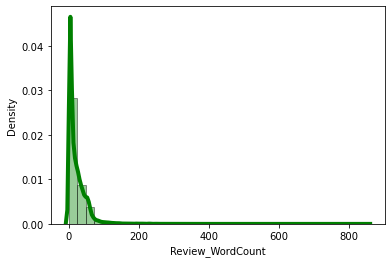

In [40]:
sns.distplot(df_rp['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'g',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [41]:
df_rp['Review_CharCount'] = df_rp['Review'].str.len()
df_rp[['Review_CharCount','Review']].head()

,Review_CharCount,Review
0,175,really nice actually felt like infinix brand m...
1,202,wonderful laptop nice sometimes heat startedpe...
2,194,great product brilliant design sleek beautiful...
3,47,simply awesome everything excellent price point
4,56,awesome mind blow purchase ever nice performan...


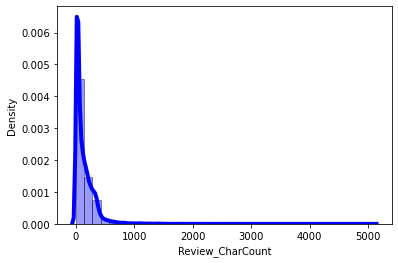

In [42]:
sns.distplot(df_rp['Review_CharCount'], hist = True, kde = True,
            bins = int(180/5), color = 'blue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [43]:
df_rp.shape


(47355, 4)

In [44]:
from scipy import stats
from scipy.stats import zscore

z_score = zscore(df_rp[['Review_WordCount']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df_rp = df_rp[filtering_entry]
df_rp.shape

(46607, 4)

In [46]:
Data_loss=((21661-21313)/21661)*100
Data_loss

1.6065740270532294

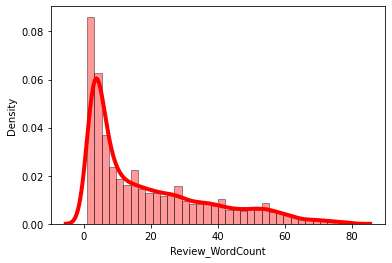

In [47]:
sns.distplot(df_rp['Review_WordCount'], hist = True, kde = True,
            bins = int(180/5), color = 'r',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

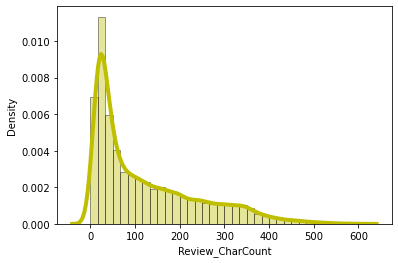

In [48]:
sns.distplot(df_rp['Review_CharCount'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [49]:
def freq_words(x, terms = 25):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # Selecting top 25 most frequent words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (16,8))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

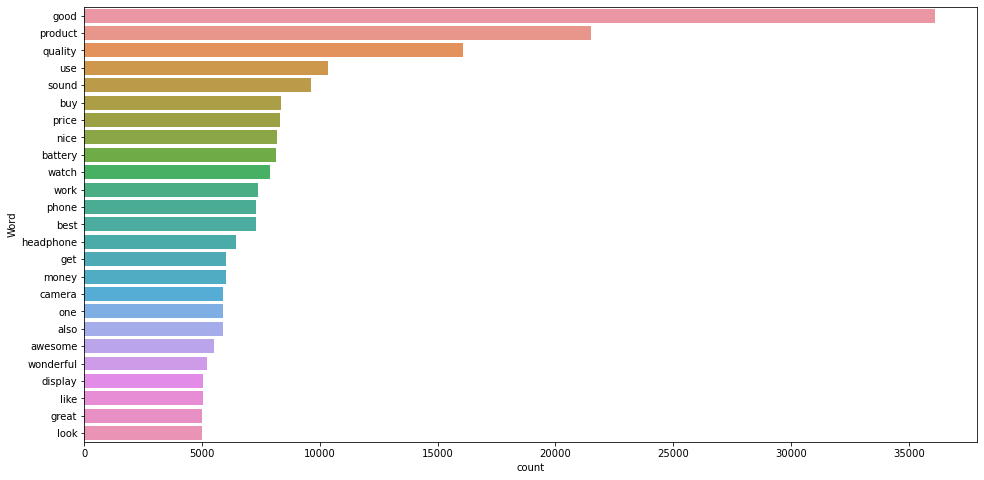

In [50]:
freq_words(df_rp['Review'])


In [51]:
def rare_words(x, terms = 25):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    # Selecting top 25 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (16,8))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

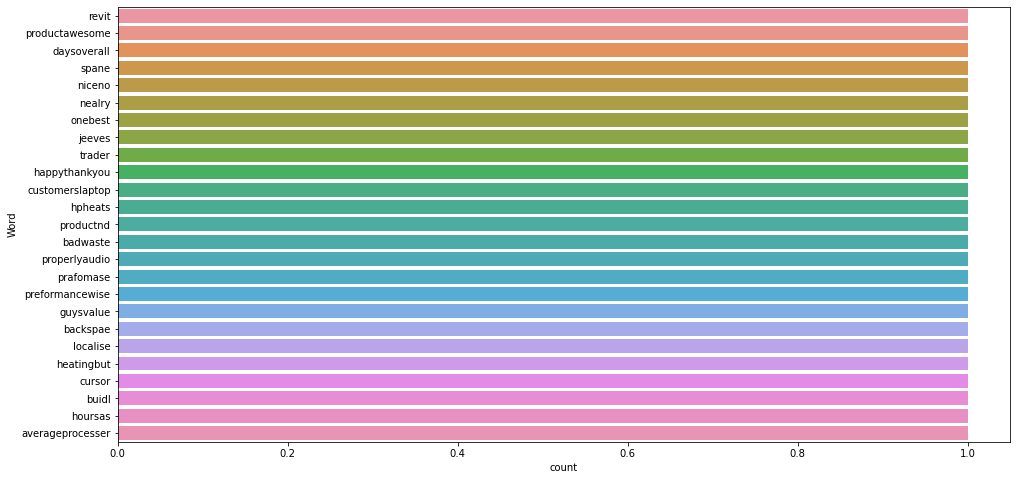

In [52]:
rare_words(df_rp['Review'])


In [53]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [54]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()
    

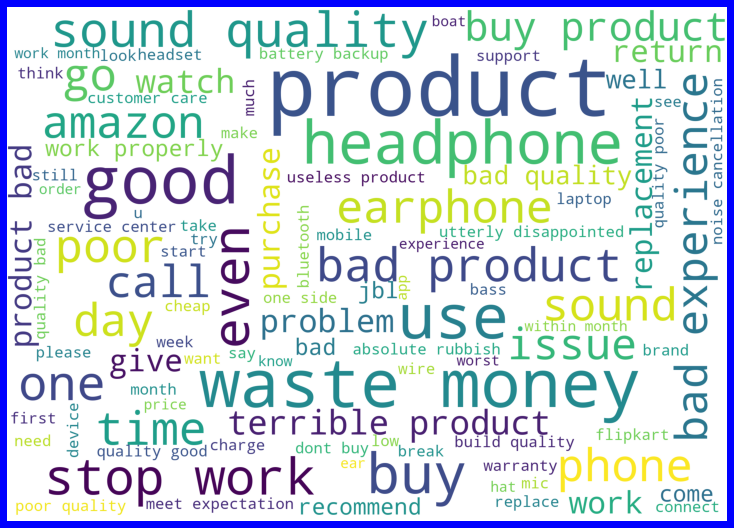

In [55]:
from wordcloud import WordCloud

df_r1=df_rp['Review'][df_rp['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

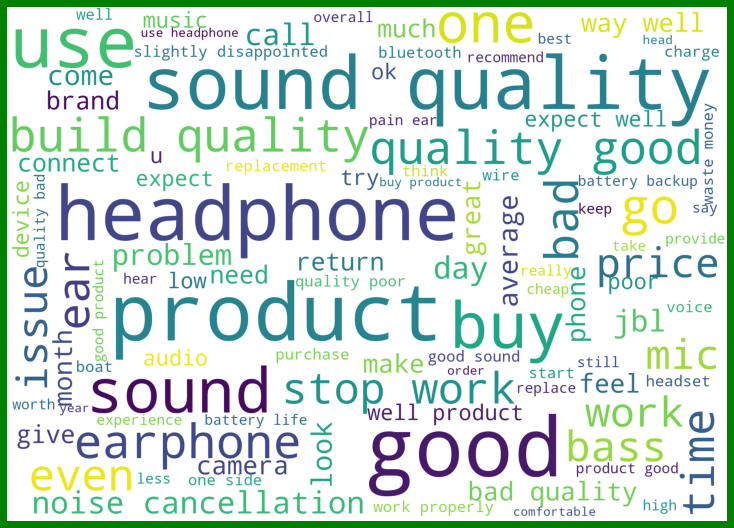

In [56]:
from wordcloud import WordCloud

df_r2=df_rp['Review'][df_rp['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r2))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

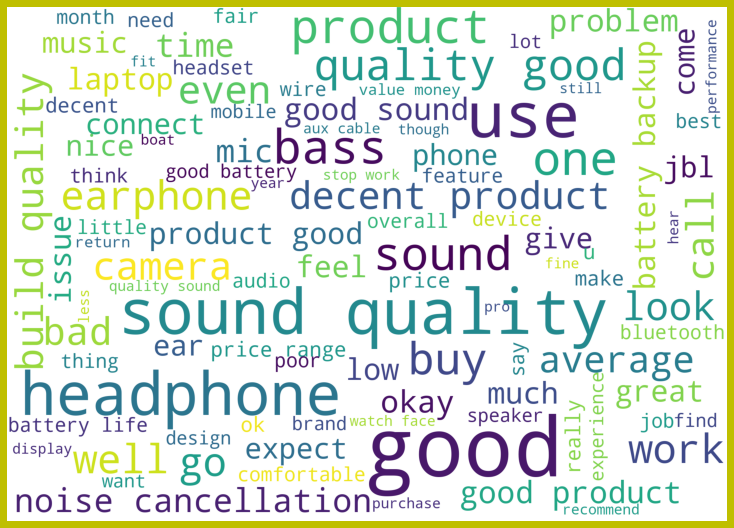

In [57]:
from wordcloud import WordCloud

df_r3=df_rp['Review'][df_rp['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r3))

plt.figure(figsize=(10,8),facecolor='y')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

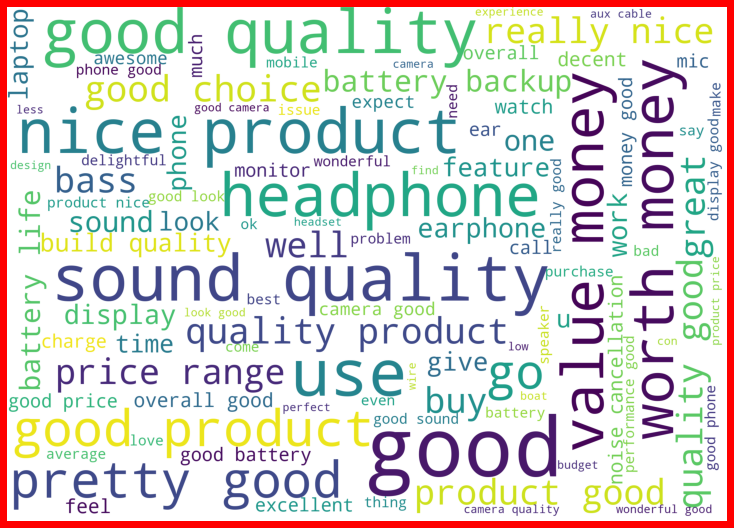

In [58]:
from wordcloud import WordCloud

df_r4=df_rp['Review'][df_rp['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r4))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

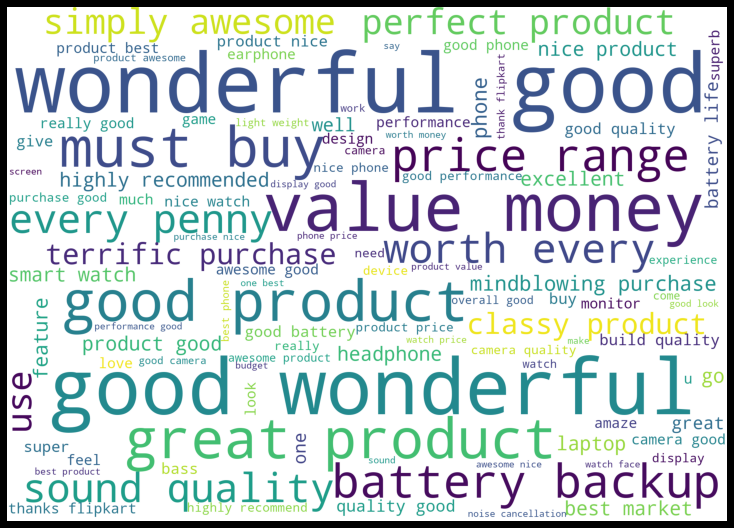

In [59]:
from wordcloud import WordCloud

df_r5=df_rp['Review'][df_rp['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df_r5))

plt.figure(figsize=(10,8),facecolor='black')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [60]:
df_rp.Ratings.value_counts()


5    24450
4     8405
1     5644
3     4209
2     3231
Name: Ratings, dtype: int64

In [61]:
x = df_rp['Review']
y = df_rp['Ratings']

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 17000)
word_vectorizer.fit(x)
train_word_features = word_vectorizer.transform(x)

In [64]:
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 8000)
char_vectorizer.fit(x)
train_char_features = char_vectorizer.transform(x)


In [65]:
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])


In [66]:
from sklearn.model_selection import train_test_split
seed = 1
x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size = 0.25, random_state = seed)

In [67]:
x_train.shape


(34454, 25000)

In [68]:
x_test.shape


(11485, 25000)

In [69]:
y_train.shape


(34454,)

In [70]:
y_test.shape


(11485,)

In [71]:
y.value_counts()


5    24450
4     8405
1     5644
3     4209
2     3231
Name: Ratings, dtype: int64

In [72]:
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 18373, 4: 6281, 1: 4209, 3: 3143, 2: 2448})


In [73]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = {1: 18501, 2: 18501, 3: 18501, 4:18501, 5: 18501})
x_train1,y_train1 = sm.fit_resample(x_train,y_train)

print("The number of classes after fit {}".format(Counter(y_train1)))

The number of classes after fit Counter({5: 18501, 1: 18501, 3: 18501, 2: 18501, 4: 18501})


<AxesSubplot:xlabel='Ratings', ylabel='count'>

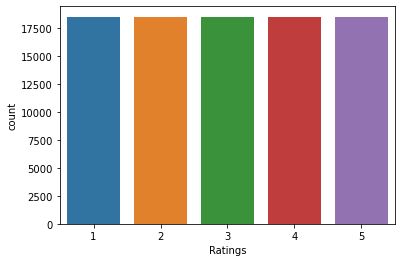

In [74]:
sns.countplot(y_train1)


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [76]:

lg=LogisticRegression()
lg.fit(x_train1, y_train1)
lg.score(x_train1, y_train1)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.8491075315629082
[[1151  206   55   22    1]
 [ 106  516  121   32    8]
 [  52  176  692  121   25]
 [  23   62  151 1759  129]
 [  28   41   82  292 5634]]
              precision    recall  f1-score   support

           1       0.85      0.80      0.82      1435
           2       0.52      0.66      0.58       783
           3       0.63      0.65      0.64      1066
           4       0.79      0.83      0.81      2124
           5       0.97      0.93      0.95      6077

    accuracy                           0.85     11485
   macro avg       0.75      0.77      0.76     11485
weighted avg       0.86      0.85      0.85     11485

